In [1]:
# define the questions you need to answer
# What genre of movie grosses the most? Profit?
# What genre of movie has the highest critic rating?
# What genre of movie has the highest viewer rating?
# What factors, other than genre, do the above topics have in common? Actors? Directors? Writters? Big budget?

In [2]:
# Importing and exploring the data


In [3]:
# Running this cell will take a while but will import all of the data we have and we can explore it from there.
import pandas as pd
import numpy as np
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', thousands=',')
imdbName = pd.read_csv('zippedData/new_imdb/name.basics.tsv.gz', sep='\t')
imdbTitleAkas = pd.read_csv('zippedData/new_imdb/title.akas.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1')
imdbTitleBasics = pd.read_csv('zippedData/new_imdb/title.basics.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1')
imdbTitleCrew = pd.read_csv('zippedData/new_imdb/title.crew.tsv.gz', sep='\t')
imdbTitleRatings = pd.read_csv('zippedData/new_imdb/title.ratings.tsv.gz', sep='\t')
imdbTitlePrin = pd.read_csv('zippedData/new_imdb/title.principals.tsv.gz', sep='\t')
rtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rtReviews = pd.read_csv('zippedData/new_imdb/name.basics.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

C:\Users\Sweet Deals\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sweet Deals\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Now that all the data is imported, let's check that they imported correctly.

# This data frame looks like it's only info on boxoffice gross
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
# Uneccessary and becomes more trouble than it's worth to combine
imdbName

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0059956,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
...,...,...,...,...,...,...
10505047,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10505048,nm9993716,Essias Loberg,\N,\N,NaN,\N
10505049,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10505050,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [6]:
# It appears that most of this data is either corrupted
# repeated with a different name or incomplete.
# This data is probably not worth making sense of.
imdbTitleAkas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,ÐÐ°ÑÐ¼ÐµÐ½ÑÑÑÐ°,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tÃ¡nc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,ÎÎ±ÏÎ¼ÎµÎ½ÏÎ¯ÏÎ±,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,ÐÐ°ÑÐ¼ÐµÐ½ÑÐ¸ÑÐ°,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
24169281,tt9916852,4,ã¨ãã½ã¼ã #3.20,JP,ja,\N,\N,0
24169282,tt9916852,5,EpisÃ³dio #3.20,PT,pt,\N,\N,0
24169283,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
24169284,tt9916852,7,à¤à¤ªà¤¿à¤¸à¥à¤¡ #3.20,IN,hi,\N,\N,0


In [7]:
imdbTitleBasics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7342349,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7342350,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7342351,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7342352,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [8]:
imdbTitleCrew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
7342349,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342350,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342351,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342352,tt9916856,nm10538645,nm6951431


In [9]:
imdbTitleRatings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1660
1,tt0000002,6.1,203
2,tt0000003,6.5,1373
3,tt0000004,6.2,123
4,tt0000005,6.2,2161
...,...,...,...
1091113,tt9916580,7.2,5
1091114,tt9916690,6.6,5
1091115,tt9916720,6.0,66
1091116,tt9916766,6.9,15


In [10]:
# Uneccessary and becomes more trouble than it's worth to combine
imdbTitlePrin

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
41887285,tt9916880,5,nm0996406,director,principal director,\N
41887286,tt9916880,6,nm1482639,writer,\N,\N
41887287,tt9916880,7,nm2586970,writer,books,\N
41887288,tt9916880,8,nm1594058,producer,producer,\N


In [11]:
rtMovie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [12]:
rtReviews

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0059956,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
...,...,...,...,...,...,...
10505047,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10505048,nm9993716,Essias Loberg,\N,\N,NaN,\N
10505049,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10505050,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [13]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [14]:
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
# based on what we can see, as well as making
# some assumptions based on where the data come from,
# we can conclude that some of these data frames 
# will have consistent naming/labeling schemes 
# with one another, such as those that came from
# imdb. Let's join all imdb data frame on like values
# into one concatenated data frame.

In [16]:
# First lets check what columns each data frame for the imdb's have in common.

print(
    '-imdbName: ', '\n',list(imdbName.columns),'\n',
    '-imdbTitleAkas: ','\n',list(imdbTitleAkas.columns),'\n',
    '-imdbTitleBasics', '\n',list(imdbTitleBasics.columns),'\n',
    '-imdbTitleCrew: ', '\n',list(imdbTitleCrew.columns),'\n',
    '-imdbTitleRatings: ', '\n',list(imdbTitleRatings.columns),'\n',
    '-imdbTitlePrin: ', '\n',list(imdbTitlePrin.columns)
)

-imdbName:  
 ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'] 
 -imdbTitleAkas:  
 ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'] 
 -imdbTitleBasics 
 ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres'] 
 -imdbTitleCrew:  
 ['tconst', 'directors', 'writers'] 
 -imdbTitleRatings:  
 ['tconst', 'averageRating', 'numVotes'] 
 -imdbTitlePrin:  
 ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']


In [17]:
# It looks like imdbTitleAkas doesn't have any columns
# in common with the rest of the data from the other
# imdb data frames. It's probably best we ommit this
# data frame, entirely, rather than force it to fit in.

# imdbName and imdbTitlePrin also poses some problems. Combining them
# will result in duplicate rows as they a list of 
# the movie staff and not the movies them selves. It's best
# we just manually explore these these later.

# As for the rest, it seems that imdbTitleBasics
# imdbTitleCrew, imdbTitleRatings
# has 'tconst' in common.
# let's combine the above 3 frames on 'tconst'

In [18]:
# This cell should combin all 4 Data frames into 1 data
# frame called imdb. This may also take a
# significant amount of time
imdbBasicsCrew = pd.merge(imdbTitleBasics, imdbTitleCrew, on=['tconst'])
imdb = pd.merge(imdbBasicsCrew, imdbTitleRatings, on=['tconst'])

In [19]:
# Lets run imdb as a data frame to check for success.
imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N,5.6,1660
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N,6.1,203
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",nm0721526,\N,6.5,1373
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",nm0721526,\N,6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",nm0005690,\N,6.2,2161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091113,tt9916580,tvEpisode,Horrid Henry Horrid Boy?,Horrid Henry Horrid Boy?,0,2012,\N,10,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",7.2,5
1091114,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,\N,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",6.6,5
1091115,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",nm10538600,\N,6.0,66
1091116,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",\N,\N,6.9,15


In [20]:
# Success!...kinda. It seems our new data frame seems to have
# some extrenuous data (namely, titleType).
# For simplicity's sake, we only care about box office
# movies. Let's check to see how many titleTypes we
# need to filter out.

In [21]:
pd.unique(imdb['titleType'])

array(['short', 'movie', 'tvShort', 'tvSeries', 'tvMovie', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [22]:
# out of these, we only TRUELY care about 'movie'.
# lets filter everything else out. And while were at it
# let's get rid of all rows who's 'isAdult' value is
# equal to 1...for obvious reasons...
imdb.drop(imdb.loc[imdb['titleType']=='tvEpisode'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvMiniSeries'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvMovie'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvShort'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvSpecial'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvSeries'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='video'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='short'].index, inplace=True)
imdb.drop(imdb.loc[imdb['isAdult']==1].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='videoGame'].index, inplace=True)

In [23]:
# While we're at it, lets remove some columns that
# don't provide any usful information/aren't needed anymore
imdb = imdb.drop(columns = ['tconst', 'titleType', 'isAdult', 'endYear'], axis = 1)

In [24]:
# Let's check for' success!
imdb

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
8,Miss Jerry,Miss Jerry,1894,45,Romance,nm0085156,nm0085156,5.9,155
259,Soldiers of the Cross,Soldiers of the Cross,1900,\N,"Biography,Drama","nm0095714,nm0675140",\N,6.0,39
337,Bohemios,Bohemios,1905,100,\N,nm0063413,"nm0063413,nm0657268,nm0675388",4.7,7
371,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",nm0846879,nm0846879,6.1,597
391,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,nm0533958,"nm0092809,nm0533958",4.5,14
...,...,...,...,...,...,...,...,...,...
1091096,DrÃ¸mmeland,DrÃ¸mmeland,2019,72,Documentary,nm5684093,\N,6.5,40
1091097,Safeguard,Safeguard,2020,90,"Action,Adventure,Thriller",nm7308376,nm7308376,4.6,52
1091105,Coven,Akelarre,2020,90,"Drama,History,Horror",nm1893148,"nm1893148,nm3471432",5.9,134
1091108,The Secret of China,Hong xing zhao yao Zhong guo,2019,\N,"Adventure,History,War",nm0910951,\N,4.1,11


In [25]:
# Success! We've cut down our data frame size from
# 1 mill+ to just over 250k results. 

# This 'imdb' Data frame becomes the main data frame we
# use for querries about genre, reviews, and release years

In [26]:
# Now, just like the imdb data frames, we also have rt
# data frames that are similar in name. Let's check
# to see if there is any consistance between these.

print(
    '-rtMovie: ', '\n',list(rtMovie.columns),'\n',
    '-rtReviews: ','\n',list(rtReviews.columns),'\n'
)

-rtMovie:  
 ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'] 
 -rtReviews:  
 ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'] 



In [27]:
# Hm, unfortunate. It looks like these two data frames
# don't have any joinable columns in common.
# rtMovie has some usful info about box office gross but
# no assocciated movie title
# Vice versa, rtReviews has no usful info but presumably 
# the assocciated movie titles for rtMovies
# with no way to reliably join the two, we'll need to ommit them both

In [28]:
# Next, let's clean up some of the other data frames that are still usful to us.
# tmdb has a some extranious info that we just don't need.
# 'genre_id' & 'id' are some columns we don't need
# We need to make a decision about the data here as well.
# Since Microsoft is american company new to the movie scene
# it would be safest to start with english movies so 
# let's filter out movies that are originally english

In [29]:
tmdb.drop(tmdb.loc[tmdb['original_language']!='en'].index, inplace=True)
tmdb = tmdb.drop(columns = ['genre_ids', 'id'])
tmdb

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [30]:
# Now, lets take at our tn data frame
# it looks like our columns with currency values 
# are wirtten as stings instead of a numeric.
# this will cause a sorting problem so
# lets write a function to fix that.

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

tn.worldwide_gross = tn.worldwide_gross.apply(clean_currency).astype(np.int64)
tn.domestic_gross = tn.domestic_gross.apply(clean_currency).astype(np.int64)
tn.production_budget = tn.production_budget.apply(clean_currency).astype(np.int64)

# additionally, let's add a new column with the 
# production budget already subtracted from
# world wide gross for a total profit

tn['total_profit'] = tn.apply(lambda column: column.worldwide_gross - 
                                  column.production_budget, axis=1)

# and now let's sort by our new column
# to check our work is now a numeric value

tn.sort_values('total_profit', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


In [31]:
# Success!
# Lastely, data frame bom has a column 'studio'
# doesn't provide any significant info.
# Let's remove that as well as filling some of the
# NaN values with 0

bom = bom.fillna(0)
bom = bom.drop(columns = 'studio')
bom

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010
...,...,...,...,...
3382,The Quake,6200.0,0.0,2018
3383,Edward II (2018 re-release),4800.0,0.0,2018
3384,El Pacto,2500.0,0.0,2018
3385,The Swan,2400.0,0.0,2018


In [32]:
# Success!

# Lets recall what we have so far and take a look at what we have once more.
# imdb - info about genre and rating per movie
# tmdb - info about genre and rating per movie
# tn - info bout box office gross per movie
# bom - info bout box office gross per movie

In [33]:
imdb.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
8,Miss Jerry,Miss Jerry,1894,45,Romance,nm0085156,nm0085156,5.9,155
259,Soldiers of the Cross,Soldiers of the Cross,1900,\N,"Biography,Drama","nm0095714,nm0675140",\N,6.0,39
337,Bohemios,Bohemios,1905,100,\N,nm0063413,"nm0063413,nm0657268,nm0675388",4.7,7
371,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",nm0846879,nm0846879,6.1,597
391,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,nm0533958,"nm0092809,nm0533958",4.5,14


In [34]:
tmdb.head()

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [36]:
bom.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010


In [37]:
# Lastly, let's rename the columns contailing movie titles to be
# consistant across our 4 data frames in case we need to concatenate
# them for greater insight on a movie's atrabutes.
imdb = imdb.rename(columns = {'primaryTitle': 'title'})
# tmdb = tmdb.rename(columns = {'original_title': 'title'})
tn = tn.rename(columns = {'movie': 'title'})

In [38]:
tmdb

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [39]:
# Now, we can finally ask our data some questions and get usful infomation.
# Since were looking for exacutable information for a large corperation
# money will be our driving factor.

In [40]:
# 1.) What movie's made the most profit? Are there any traits in common with those?

In [195]:
# lets start by sorting the values of out bom data frame by 'domestic_gross' and
# return only the top 50 results.
bomDom = bom.sort_values('domestic_gross', ascending=False).head(50)

In [247]:
# Next, lets import matplotlib to help create a nice horizontal bar graph for data visualization
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


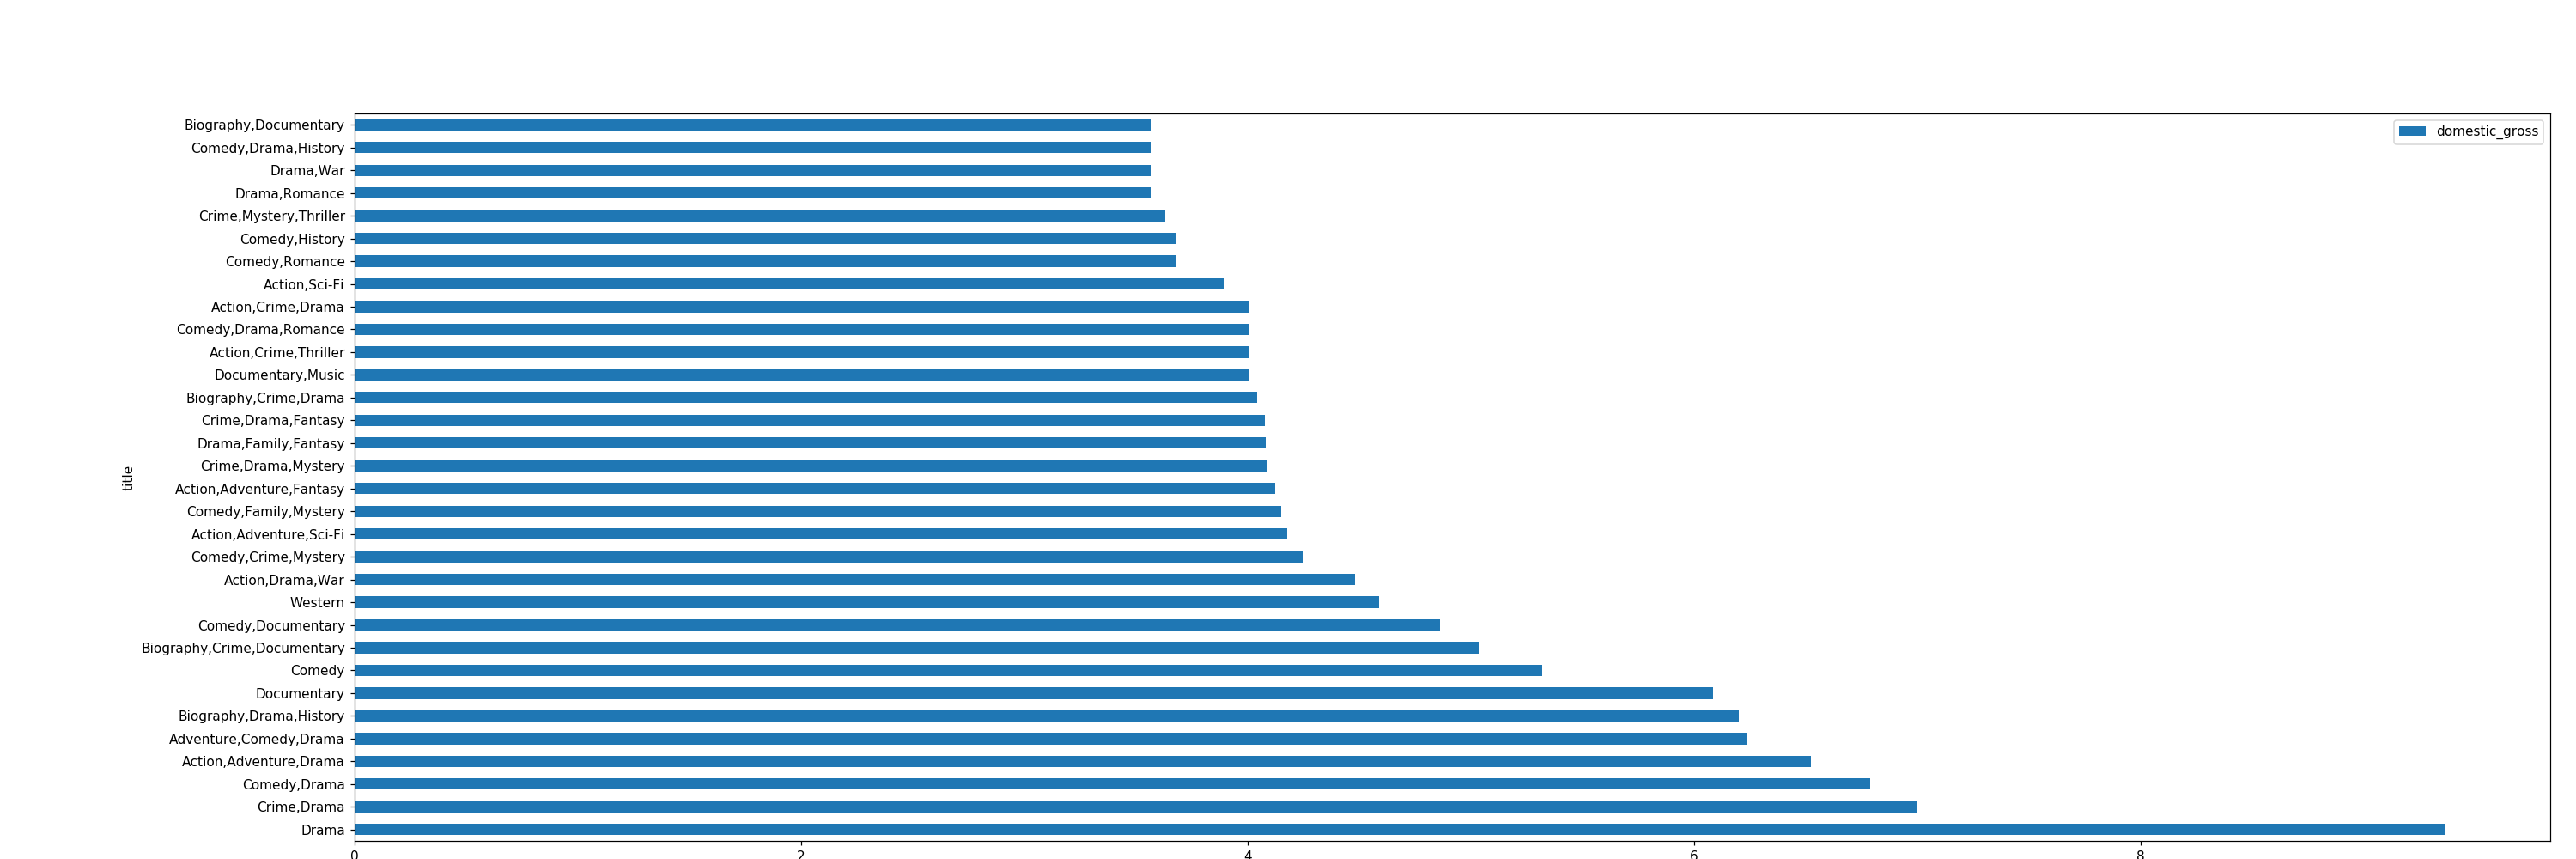

In [248]:
# Now that we have this, let's not forget to save the image to out repository.
bomDom.plot('title', 'domestic_gross', kind='barh', figsize = (30, 10))
plt.savefig('plots.pdf')

In [199]:
# So, we have a nice and neat histogram of what some of the most profitable movies have been for a domestic audience.
# But that doesn't help us unless we know to properties of these movies. What it does let us know is that, 
# the group we've grabbed are highest earners. And Microsoft interested in making as much money as they can.
# Let's merge on 'title' with one of our other data frames to take a look at some other information about each movie

imdbBom = pd.merge(imdb, bom, on=['title'])
imdbBom

,title,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,domestic_gross,foreign_gross,year
0,Passion,Madame DuBarry,1919,85,"Biography,Drama,Romance",nm0523932,"nm0266183,nm0473134",6.8,762,92200.0,0.0,2013
1,Passion,Passion,1954,84,"Adventure,Western",nm0245385,"nm0237532,nm0655755,nm0500837,nm0261455",6.2,281,92200.0,0.0,2013
2,Passion,Passion,1982,88,"Comedy,Drama",nm0000419,"nm0140643,nm0000419",6.2,2275,92200.0,0.0,2013
3,Passion,Zui ai,1986,95,"Drama,Romance",nm0151827,nm0151827,6.8,77,92200.0,0.0,2013
4,Passion,Ishq,1997,161,"Action,Comedy,Drama",nm0409791,"nm0442396,nm1007381,nm1065687,nm0661494",6.9,9774,92200.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
4191,How Long Will I Love U,Chao shi kong tong ju,2018,101,"Comedy,Fantasy,Romance",nm6050764,nm6050764,6.4,845,747000.0,82100000.0,2018
4192,Helicopter Eela,Helicopter Eela,2018,135,Drama,nm1224879,"nm3784276,nm1628153",5.6,971,72000.0,0.0,2018
4193,Last Letter,Last Letter,2020,120,Romance,nm0412517,nm0412517,7.1,336,181000.0,0.0,2018
4194,Last Letter,"Ni hao, Zhihua",2018,114,"Drama,Romance",nm0412517,"nm0412517,nm5605482",6.4,520,181000.0,0.0,2018


In [225]:
# Next, we sort the value of 'domestic_gross' again to make sure we're working with the right group
# However, let's expand from 50 to  1,000 entries to be more general and get a 'bigger picture'
imdbBomDom = imdbBom.sort_values('domestic_gross', ascending=False).head(1000)
imdbBomDom.head(50)

,title,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,domestic_gross,foreign_gross,year
2804,Black Panther,Black Panther,2018,134,"Action,Adventure,Sci-Fi",nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",7.3,613622,700100000.0,646900000.0,2018
3780,Avengers: Infinity War,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi","nm0751648,nm0751577","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.4,811986,678800000.0,1369.5,2018
1565,Jurassic World,Jurassic World,2015,124,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",7.0,573593,652300000.0,1019.4,2015
3635,Incredibles 2,Incredibles 2,2018,118,"Action,Adventure,Animation",nm0083348,nm0083348,7.6,243526,608600000.0,634200000.0,2018
3683,Rogue One: A Star Wars Story,Rogue One,2016,133,"Action,Adventure,Sci-Fi",nm2284484,"nm0919363,nm0006904,nm0461306,nm1729428,nm0000184",7.8,544589,532200000.0,523900000.0,2016
3166,Finding Dory,Finding Dory,2016,97,"Adventure,Animation,Comedy","nm0533691,nm0004056","nm0004056,nm0835194",7.3,236402,486300000.0,542300000.0,2016
3263,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",7.3,730088,459000000.0,946400000.0,2015
2223,The Dark Knight Rises,The Dark Knight Rises,2012,164,"Action,Adventure",nm0634240,"nm0634300,nm0634240,nm0333060,nm0004170",8.4,1496072,448100000.0,636800000.0,2012
2920,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146,"Action,Adventure,Mystery",nm1349376,"nm0064479,nm1578335,nm1056741",7.5,607822,424700000.0,440300000.0,2013
3912,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128,"Action,Adventure,Sci-Fi",nm1291105,"nm2081046,nm1119880,nm0000341",6.2,260913,417700000.0,891800000.0,2018


In [224]:
# The code bellow returns a count of every instance of the genre combinations in
# our data frame.

# Here, we can see that the 'Drama' genre
# is by far the most popular. However, at a glace it would seem that 'Action', 'Adventure', 'Comedy'
# and 'Sci-Fi' come up more often. We can see this is true by the very next two entreis right bellow
# Drama as show by "Action, Adventure, Comdey' and 'Action, Adventure, Sci-Fi'

imdbBomDom['genres'].value_counts().head(50)

Drama                         82
Adventure,Animation,Comedy    59
Action,Adventure,Sci-Fi       53
Comedy                        39
Comedy,Drama                  33
Documentary                   29
Comedy,Romance                24
Action,Comedy,Crime           23
Comedy,Drama,Romance          22
Action,Adventure,Drama        21
Action,Adventure,Fantasy      20
Horror,Mystery,Thriller       18
Action,Thriller               18
\N                            17
Action,Adventure,Comedy       16
Action,Adventure,Thriller     15
Drama,Romance                 15
Drama,Thriller                14
Action,Adventure,Animation    14
Horror                        12
Crime,Drama                   11
Thriller                      11
Action,Crime,Drama            10
Biography,Drama,History       10
Adventure,Family,Fantasy       9
Horror,Thriller                9
Action,Crime,Thriller          9
Adventure,Comedy,Family        9
Action,Drama,Thriller          8
Crime,Drama,Thriller           8
Action,Dra

In [229]:
# we can see this is true still if we narrow back in on our data.
# Drama, though still close to the top, has moved down to 3rd place
imdbBomDom2 = imdbBom.sort_values('domestic_gross', ascending=False).head(100)
imdbBomDom2['genres'].value_counts().head(50)

Action,Adventure,Sci-Fi          22
Adventure,Animation,Comedy       14
Action,Adventure,Comedy           7
Drama                             6
Action,Adventure,Fantasy          6
Action,Adventure,Thriller         4
Comedy                            3
Action,Adventure,Animation        3
Adventure,Fantasy                 3
Crime,Drama                       2
Documentary                       2
Drama,Fantasy,Romance             1
Comedy,Drama                      1
Animation,Comedy,Crime            1
Action,Drama,Romance              1
Documentary,Drama,Sport           1
Adventure,Drama,Sci-Fi            1
Drama,Sci-Fi,Thriller             1
Sci-Fi                            1
Action                            1
Action,Adventure,Drama            1
Drama,Mystery,Thriller            1
Drama,Family,Fantasy              1
Thriller                          1
Family                            1
Action,Adventure,Family           1
Animation,Comedy,Family           1
Action,Adventure,Crime      

In [230]:
# Let's run another experiment to cover our bases. This time we'll filter out any
# movies that grossed less that $10,000,000 and then get a value count of genres from that new list.
# This will be our broadest check.
imdbBomHighDoll = imdbBom.loc[imdbBom['domestic_gross'] >= 10000000]
imdbBomHighDoll['genres'].value_counts().head(50)

Drama                         142
Adventure,Animation,Comedy     68
Comedy,Drama                   55
Comedy                         54
Action,Adventure,Sci-Fi        53
Drama,Romance                  51
Documentary                    41
Comedy,Romance                 40
Comedy,Drama,Romance           40
Horror,Mystery,Thriller        32
Action,Adventure,Fantasy       31
Action,Comedy,Crime            28
\N                             27
Action,Adventure,Drama         27
Action,Thriller                25
Action,Crime,Thriller          25
Action,Crime,Drama             22
Drama,Thriller                 21
Crime,Drama,Thriller           19
Action,Adventure,Comedy        17
Biography,Drama,History        17
Thriller                       17
Biography,Drama                16
Action,Adventure,Thriller      16
Action,Adventure,Animation     15
Horror,Thriller                15
Horror                         15
Crime,Drama                    15
Biography,Comedy,Drama         14
Action,Drama,T

In [260]:
# Let's make a nice and neat visual horizontal bar graph for out new findings while we're here.
imdbBomDom3 = imdbBom.sort_values('domestic_gross', ascending=False).head(50)
imdbBomDom3['genres'].value_counts().plot(kind='barh')
plt.savefig('imdbBom-highest-earners.pdf')

In [ ]:
# Inteseting, our data now has change slightly, once again.
# We see that Drama commands the lead with the most common genre
# but what we can see has been true across every check has been
# the presence of comedy in all the top 5 spots. People like to laugh!

In [231]:
# 1.) What movie's made the most profit? Are there any traits in common with those?

# A: The data would suggest that the movies that see the most box office success, both as
# one of the most common and as one of the highest earners, is 'Action, animation, & Comedy'
# Drama is the most common movie type
# Action, Adventure, & Sci-Fi is the single highest earner genre combination

In [205]:
# 2.) What movies have the highest Rating?

In [240]:
# First, we'll need to take a look at our data again but sort it on NumVotes
# numVotes is the number of times a person has rated a particular movie.
# we can take a way from this that the higher the numVotes value, the more
# talked about a movie is. However, 'most popular' doesn't always mean
# 'best'. It would be more accurate to say that higher NumVotes means
# more attention and attention is what we need more of for building a brand
# for your movies.

# This code filters out any rows bellow 10,000 votes. We've invalidating 
# those movies who didn't set a good enough example for gaining traction.
imdbNumV = imdb.loc[imdb['numVotes'] >= 10000]
imdbNumV.sort_values('numVotes', ascending=False)

,title,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
81555,The Shawshank Redemption,The Shawshank Redemption,1994,142,Drama,nm0001104,"nm0000175,nm0001104",9.3,2305519
245359,The Dark Knight,The Dark Knight,2008,152,"Action,Crime,Drama",nm0634240,"nm0634300,nm0634240,nm0333060,nm0004170",9.0,2268767
571614,Inception,Inception,2010,148,"Action,Adventure,Sci-Fi",nm0634240,nm0634240,8.8,2030858
97802,Fight Club,Fight Club,1999,139,Drama,nm0000399,"nm0657333,nm0880243",8.8,1826941
81339,Pulp Fiction,Pulp Fiction,1994,154,"Crime,Drama",nm0000233,"nm0000233,nm0000812",8.9,1799475
...,...,...,...,...,...,...,...,...,...
652948,Queen of the Desert,Queen of the Desert,2015,128,"Adventure,Biography,Drama",nm0001348,nm0001348,5.7,10010
77013,Trespass,Trespass,1992,101,"Action,Thriller",nm0001353,"nm0301826,nm0000709",6.3,10010
953827,Badrinath Ki Dulhania,Badrinath Ki Dulhania,2017,139,"Comedy,Drama,Romance",nm4264671,nm4264671,6.1,10009
450113,Gulabo Sitabo,Gulabo Sitabo,2020,124,"Comedy,Drama",nm1999473,nm4962323,6.3,10006


In [234]:
# Next, we can use the new filtered data frame to sort out our averageRating to find what genres were the most liked.
# As we're trying to only validate movies that had a rating betetr than a D, anything less that a 7.0 rating will
# be ommitted. just like last time, we'll take the top 100 ratings, top 1,000, and create a cut-off for totally invalidadted
# rows of data

imdbAvRat = imdbNumV.sort_values('averageRating', ascending = False).head(100)
imdbAvRat2 = imdbNumV.sort_values('averageRating', ascending = False).head(1000)
imdbAvRat3 = imdbNumV.loc[imdb['averageRating'] >= 7.0]

In [235]:
imdbAvRat['genres'].value_counts().head(50)

Drama                            11
Comedy,Drama                      6
Crime,Drama                       6
Action,Adventure,Drama            5
Action,Crime,Drama                5
Drama,Romance                     4
Comedy,Romance                    3
Adventure,Comedy,Drama            3
Documentary                       3
Crime,Drama,Thriller              3
Comedy,Drama,Romance              2
Action,Sci-Fi                     2
Western                           2
Biography,Drama,History           2
Comedy                            2
Action,Adventure,Fantasy          2
Biography,Crime,Documentary       2
Action,Crime,Thriller             1
Drama,Music                       1
Comedy,Drama,History              1
Comedy,History                    1
Comedy,Documentary                1
Biography,Drama,Music             1
Animation,Comedy,Family           1
Drama,Thriller                    1
Action,Drama,War                  1
Horror,Mystery,Thriller           1
Animation,Drama,War         

In [236]:
imdbAvRat2['genres'].value_counts().head(50)

Drama                          102
Drama,Romance                   45
Comedy,Drama                    42
Comedy,Drama,Romance            30
Crime,Drama                     25
Action,Crime,Drama              25
Biography,Drama,History         23
Crime,Drama,Thriller            22
Drama,War                       21
Crime,Drama,Mystery             19
Documentary                     19
Comedy,Romance                  16
Biography,Drama                 15
Adventure,Animation,Comedy      15
Action,Adventure,Sci-Fi         14
Comedy,Crime,Drama              12
Action,Adventure,Animation      12
Biography,Crime,Drama           11
Comedy                          11
Crime,Drama,Film-Noir           11
Drama,Thriller                  11
Adventure,Comedy,Drama           9
Action,Adventure,Drama           8
Adventure,Biography,Drama        8
Comedy,Drama,Family              7
Drama,Family                     7
Mystery,Thriller                 7
Drama,Music                      7
Documentary,Music   

In [237]:
imdbAvRat3['genres'].value_counts().head(50)

Drama                         266
Comedy,Drama                  189
Comedy,Drama,Romance          169
Drama,Romance                 169
Crime,Drama,Thriller          109
Action,Crime,Drama            106
Biography,Drama,History        80
Crime,Drama                    78
Crime,Drama,Mystery            70
Comedy                         66
Adventure,Animation,Comedy     61
Biography,Drama                57
Biography,Crime,Drama          51
Comedy,Crime,Drama             47
Drama,Thriller                 46
Action,Adventure,Sci-Fi        46
Documentary                    45
Drama,War                      42
Comedy,Romance                 42
Action,Crime,Thriller          39
Action,Adventure,Drama         38
Action,Adventure,Comedy        37
Drama,Mystery,Thriller         35
Biography,Comedy,Drama         35
Comedy,Drama,Music             34
Action,Adventure,Animation     34
Action,Comedy,Crime            31
Comedy,Drama,Fantasy           30
Crime,Drama,Romance            28
Adventure,Come

In [262]:
# Once again, let's make a nice and neat Horizontal Bar Graph
imdbAvRat4 = imdbNumV.sort_values('averageRating', ascending = False).head(50)
imdbAvRat4['genres'].value_counts().plot(kind='barh')
plt.savefig('imdbBom-highest-rated-genres.pdf')

In [241]:
# So, here is something interesting that we didn't see in the our domestic_gross check.
# Here, we see that Drama is the undisputed champion of all with not only the most
# common grenre type for all three checks but also holds the very top spot for being
# the highest rated genre at 9.3 Average Rating

# However, once again wee see that comedy has come in second again as 'Comedy, Drama' for the most common data type for 2/3
# checks

In [242]:
# 2.) What movies have the highest Rating?

# The data shows that purly drama movies have the highest ratings as well as being
# the most common genre type.
# The second most common genre combination is Comedy & Drama

In [243]:
# 3.) How should Microsoft take this information and act upon it.

# As an observation, I'd say that the two results couldn't be more different from each other.
# But it's important to hit on both Top Earner genres and Top Rated genres.
# building up brand image will be the best way to start on the right foot. A pure drama or 'drama, comedy'
# is statistically the safest way to build up a likable reputaion without sacraficing of monitary gain completely.
# Once a customer trust is foraged and you brand is known for making likable movies, it would then be smart to move into
# 'Action, Adventure, Sci-Fi' or 'Action, Animation, Comedy' for a prefrence of monetary gain to build up bigger budgets for next projects.